In [6]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
od.download(
 "https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anizuro
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [23]:
print(data.info())
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None
sl_no               int64
gender             object
ssc_p     

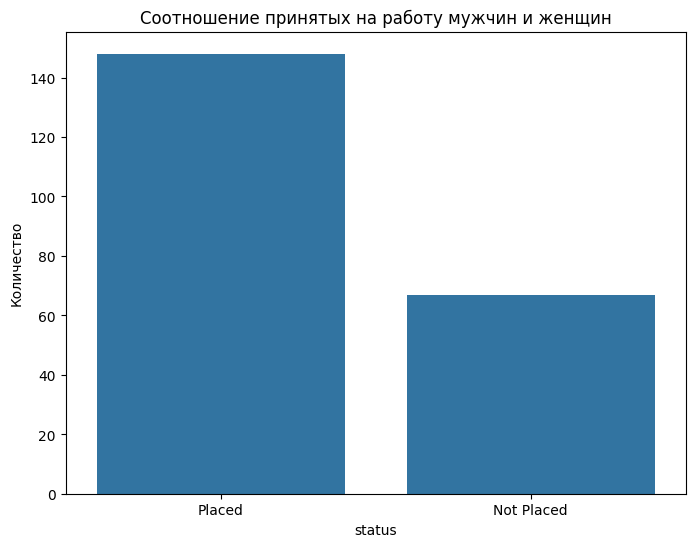

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data)
plt.title('Соотношение принятых на работу мужчин и женщин')
plt.ylabel('Количество')
plt.show()

In [25]:
data.isna().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [26]:
data["salary"].fillna(data["salary"].mean(), inplace=True)
data.isna().sum()

<ipython-input-26-486d638e66e8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["salary"].fillna(data["salary"].mean(), inplace=True)


,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


numeric_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
data_numeric = data[numeric_features]

scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data_numeric)

# Преобразование обратно в DataFrame для удобства
data_standardized_df = pd.DataFrame(data_standardized, columns=numeric_features)

data_standardized_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,-2.414078e-01
1,1.113369,1.103448,1.513267,1.087157,0.687620,-1.147234e+00
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,-5.002152e-01
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,-7.532285e-16
4,1.712332,0.668391,0.943909,1.864806,-1.164676,1.764349e+00
...,...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321,1.440840e+00
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711,-1.767060e-01
212,-0.028087,0.061335,0.903046,-0.989091,1.278706,8.210139e-02
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,-1.095472e+00


In [28]:
data = data.drop(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], axis = 1)

#Объединение
data = pd.concat([data_standardized_df, data], axis=1)
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,sl_no,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,-2.414078e-01,1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,1.113369,1.103448,1.513267,1.087157,0.687620,-1.147234e+00,2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,-5.002152e-01,3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,-7.532285e-16,4,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,1.712332,0.668391,0.943909,1.864806,-1.164676,1.764349e+00,5,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321,1.440840e+00,211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711,-1.767060e-01,212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,-0.028087,0.061335,0.903046,-0.989091,1.278706,8.210139e-02,213,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,-1.095472e+00,214,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [29]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding для бинарных столбцов
label_encode_columns = ['gender', 'workex', 'status']
label_encoder = LabelEncoder()
for col in label_encode_columns:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

# One-Hot Encoding для номинальных столбцов
one_hot_encode_columns = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation']
data = pd.get_dummies(data, columns=one_hot_encode_columns, drop_first=True)

# Удаление исходных столбцов (опционально)
data.drop(label_encode_columns, axis=1, inplace=True)

data = data.drop(['sl_no'], axis = 1)
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_encoded,workex_encoded,status_encoded,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,-2.414078e-01,1,0,1,True,True,True,False,False,True,True
1,1.113369,1.103448,1.513267,1.087157,0.687620,-1.147234e+00,1,1,1,False,True,False,True,False,True,False
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,-5.002152e-01,1,0,1,False,False,False,False,False,False,False
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,-7.532285e-16,1,0,0,False,False,False,True,False,True,True
4,1.712332,0.668391,0.943909,1.864806,-1.164676,1.764349e+00,1,0,1,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321,1.440840e+00,1,0,1,True,True,True,False,False,False,False
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711,-1.767060e-01,1,0,1,True,True,False,True,False,True,False
212,-0.028087,0.061335,0.903046,-0.989091,1.278706,8.210139e-02,1,1,1,True,True,True,False,False,False,False
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,-1.095472e+00,0,0,1,True,True,True,False,False,False,True


In [30]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Подготовка данных
X = data.drop(['status_encoded'], axis=1)
y = data['status_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# тестируем, для признаков у которых нет ответов, мы предсказывает ответ
answers_pred = model.predict(X_test)

CPU times: user 8.92 ms, sys: 2.93 ms, total: 11.9 ms
Wall time: 12.4 ms


In [31]:
model.coef_

array([[ 1.71484341,  1.03450151,  1.10437044,  0.31378973, -0.81505364,
        -0.24422751,  0.89485749,  1.19401461,  0.78263796, -0.18821428,
        -0.50156744, -0.30711197, -0.05982447, -0.98552826, -0.21050255]])

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(accuracy_score(y_test, answers_pred))
recall_score(y_test, answers_pred)
precision_score(y_test, answers_pred)

0.8
0.7692307692307693


0.975609756097561